<a href="https://colab.research.google.com/github/nandinib1999/Weather-in-Szeged-2006-2016/blob/main/Weather_in_Szeged_2006_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nandinib1999/Weather-in-Szeged-2006-2016

Cloning into 'Weather-in-Szeged-2006-2016'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [2]:
cd "/content/Weather-in-Szeged-2006-2016"

/content/Weather-in-Szeged-2006-2016


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [108]:
df = pd.read_csv("/content/Weather-in-Szeged-2006-2016/weatherHistory.csv")
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [110]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [111]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

In [112]:
df['Date'] = df['Formatted Date'].dt.date
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09


In [113]:
df['Time'] = df['Formatted Date'].dt.time
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Time
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31,22:00:00
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31,23:00:00
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,00:00:00
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01,01:00:00
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01,02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09,17:00:00
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09,18:00:00
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09,19:00:00
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09,20:00:00


In [114]:
df['Month'] = df['Formatted Date'].dt.month
df['Month'] = df['Month'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

In [115]:
df['Year'] = df['Formatted Date'].dt.year
df['Year'] = df['Year'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

In [116]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [117]:
df_na = df[df['Precip Type'].isna()]
df_na

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Time,Month,Year
52672,2012-04-11 14:00:00+00:00,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.982,0.0,1002.40,Mostly cloudy until night.,2012-04-11,14:00:00,4,2012
52674,2012-04-11 16:00:00+00:00,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.982,0.0,1001.79,Mostly cloudy until night.,2012-04-11,16:00:00,4,2012
52675,2012-04-11 17:00:00+00:00,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.982,0.0,1001.60,Mostly cloudy until night.,2012-04-11,17:00:00,4,2012
52677,2012-04-11 19:00:00+00:00,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.982,0.0,1001.92,Mostly cloudy until night.,2012-04-11,19:00:00,4,2012
52678,2012-04-11 20:00:00+00:00,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.100,0.0,1002.20,Mostly cloudy until night.,2012-04-11,20:00:00,4,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95584,2016-10-31 18:00:00+00:00,Mostly Cloudy,NaN,8.322222,7.044444,0.85,8.0339,290.0,0.000,0.0,1021.73,Mostly cloudy starting in the afternoon.,2016-10-31,18:00:00,10,2016
95585,2016-10-31 19:00:00+00:00,Mostly Cloudy,NaN,7.627778,6.183333,0.87,8.2271,293.0,0.000,0.0,1021.76,Mostly cloudy starting in the afternoon.,2016-10-31,19:00:00,10,2016
95586,2016-10-31 20:00:00+00:00,Mostly Cloudy,NaN,7.111111,5.511111,0.89,8.5008,297.0,0.000,0.0,1021.81,Mostly cloudy starting in the afternoon.,2016-10-31,20:00:00,10,2016
95587,2016-10-31 21:00:00+00:00,Partly Cloudy,NaN,6.672222,4.961111,0.90,8.6457,299.0,0.000,0.0,1021.83,Mostly cloudy starting in the afternoon.,2016-10-31,21:00:00,10,2016


In [118]:
df_na['Summary'].unique()

array(['Mostly Cloudy', 'Partly Cloudy', 'Overcast', 'Clear', 'Foggy'],
      dtype=object)

In [119]:
grouped_df = df.groupby(['Precip Type', 'Summary']).agg({'Formatted Date':'count'})
grouped_df

Formatted Date
Precip Type Summary                                            
rain        Breezy                                           42
            Breezy and Dry                                    1
            Breezy and Foggy                                  8
            Breezy and Mostly Cloudy                        490
            Breezy and Overcast                             472
            Breezy and Partly Cloudy                        379
            Clear                                          9371
            Dangerously Windy and Partly Cloudy               1
            Drizzle                                          39
            Dry                                              34
            Dry and Mostly Cloudy                            14
            Dry and Partly Cloudy                            86
            Foggy                                          4135
            Humid and Mostly Cloudy                          40
            Humid and Overcast                                7
            Humid and Partly Cloudy                          17
            Light Rain                                       63
            Mostly Cloudy                                 26028
            Overcast                                      13916
            Partly Cloudy                                 29915
            Rain                                             10
            Windy                                             8
            Windy and Dry                                     1
            Windy and Foggy                                   3
            Windy and Mostly Cloudy                          35
            Windy and Overcast                               42
            Windy and Partly Cloudy                          67
snow        Breezy                                           12
            Breezy and Foggy                                 27
            Breezy and Mostly Cloudy                         26
            Breezy and Overcast                              56
            Breezy and Partly Cloudy                          7
            Clear                                          1392
            Foggy                                          2982
            Mostly Cloudy                                  1886
            Overcast                                       2600
            Partly Cloudy                                  1720
            Windy and Foggy                                   1
            Windy and Overcast                                3

In [120]:
grouped_df_na = df_na.groupby(['Summary']).agg({'Formatted Date':'count'})
grouped_df_na

,Formatted Date
Summary,
Clear,127
Foggy,31
Mostly Cloudy,180
Overcast,81
Partly Cloudy,98


In [121]:
summary_list = list(grouped_df_na.index)

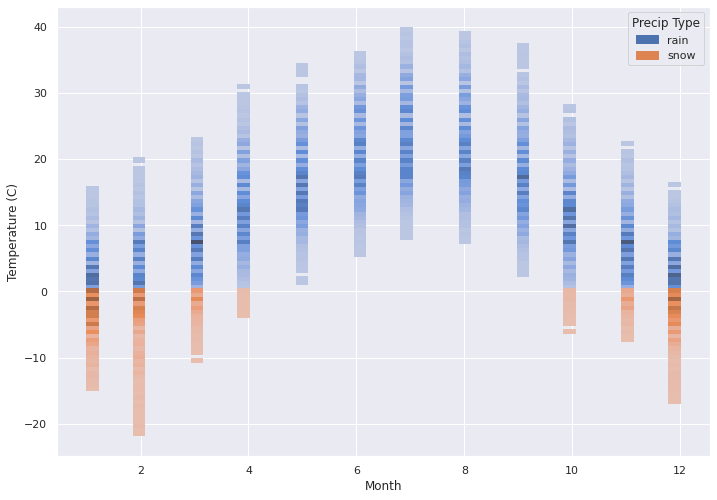

In [122]:
df_filter = df[~df['Precip Type'].isna()]
sns.histplot(x='Month', y='Temperature (C)', data=df_filter, hue="Precip Type")

In [123]:
df_filter_clear = df[df['Summary'].isin(['Clear'])]
df_filter_clear['Missing'] = df_filter_clear['Precip Type'].isna()
df_filter_clear_missing = df_filter_clear[(df_filter_clear['Missing'] == True)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


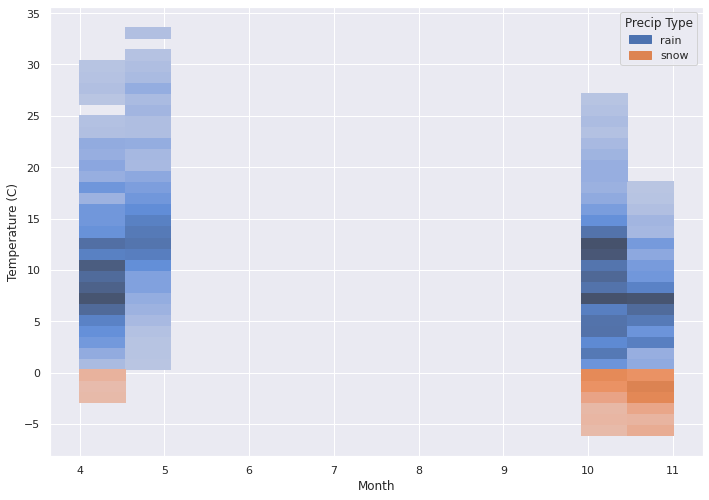

In [124]:
months = df_filter_clear_missing['Month'].unique()
df_filter_not_missing = df_filter_clear[(df_filter_clear['Missing'] == False)]
df_filter_not_missing = df_filter_not_missing[df_filter_not_missing['Month'].isin(months)]
sns.histplot(x='Month', y='Temperature (C)', data=df_filter_not_missing, hue="Precip Type")

In [125]:
df_filter_foggy = df[df['Summary'].isin(['Foggy'])]
df_filter_foggy['Missing'] = df_filter_foggy['Precip Type'].isna()
df_filter_foggy_missing = df_filter_foggy[(df_filter_foggy['Missing'] == True)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


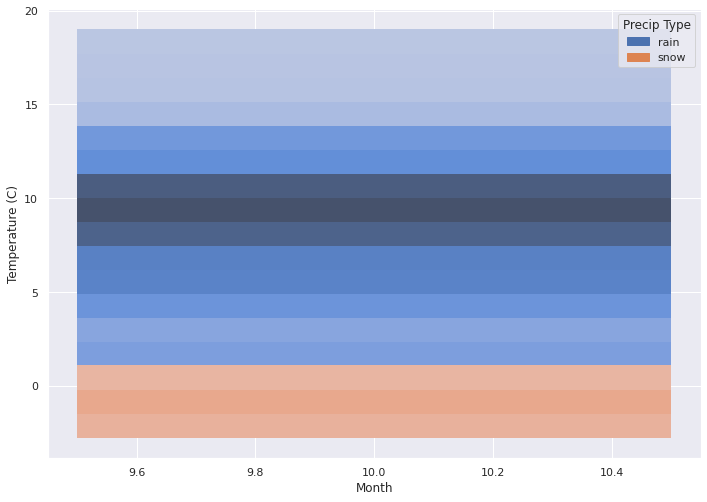

In [126]:
months = df_filter_foggy_missing['Month'].unique()
df_filter_not_missing = df_filter_foggy[df_filter_foggy['Missing'] == False]
df_filter_not_missing = df_filter_not_missing[df_filter_not_missing['Month'].isin(months)]
sns.histplot(x='Month', y='Temperature (C)', data=df_filter_not_missing, hue="Precip Type")

In [127]:
df_filter_mcloudy = df[df['Summary'].isin(['Mostly Cloudy'])]
df_filter_mcloudy['Missing'] = df_filter_mcloudy['Precip Type'].isna()
df_filter_mcloudy_missing = df_filter_mcloudy[(df_filter_mcloudy['Missing'] == True)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


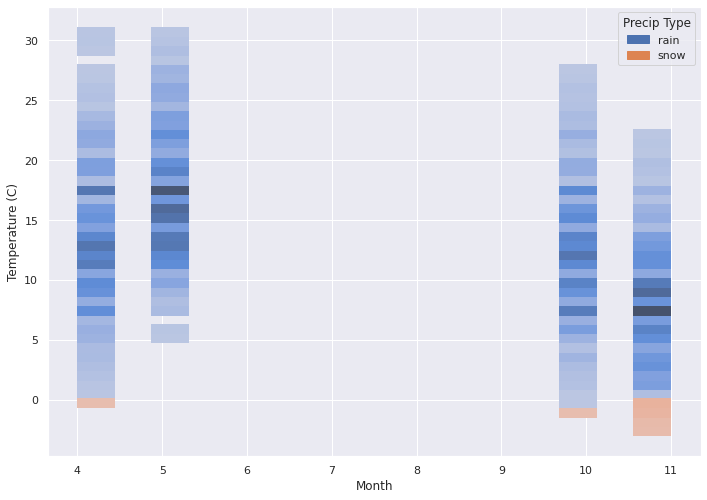

In [128]:
months = df_filter_mcloudy_missing['Month'].unique()
df_filter_not_missing = df_filter_mcloudy[df_filter_mcloudy['Missing'] == False]
df_filter_not_missing = df_filter_not_missing[df_filter_not_missing['Month'].isin(months)]
sns.histplot(x='Month', y='Temperature (C)', data=df_filter_not_missing, hue="Precip Type")

In [129]:
df_filter_overcast = df[df['Summary'].isin(['Overcast'])]
df_filter_overcast['Missing'] = df_filter_overcast['Precip Type'].isna()
df_filter_overcast_missing = df_filter_overcast[(df_filter_overcast['Missing'] == True)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


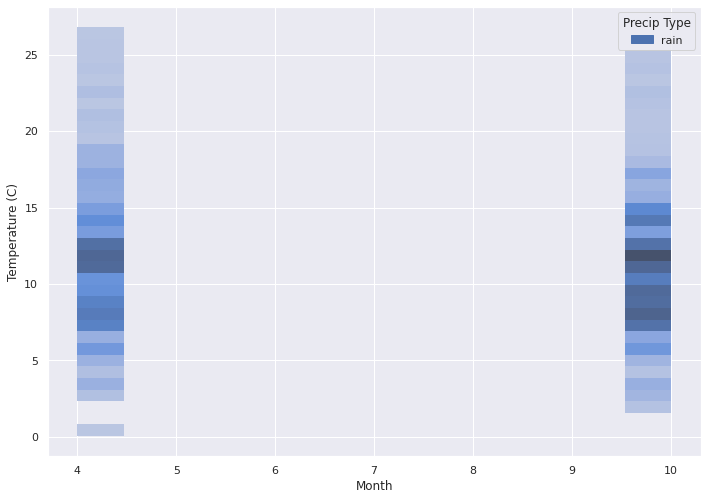

In [130]:
months = df_filter_overcast_missing['Month'].unique()
df_filter_not_missing = df_filter_overcast[df_filter_overcast['Missing'] == False]
df_filter_not_missing = df_filter_not_missing[df_filter_not_missing['Month'].isin(months)]
sns.histplot(x='Month', y='Temperature (C)', data=df_filter_not_missing, hue="Precip Type")

In [131]:
df_filter_pcloudy = df[df['Summary'].isin(['Partly Cloudy'])]
df_filter_pcloudy['Missing'] = df_filter_pcloudy['Precip Type'].isna()
df_filter_pcloudy_missing = df_filter_pcloudy[(df_filter_pcloudy['Missing'] == True)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


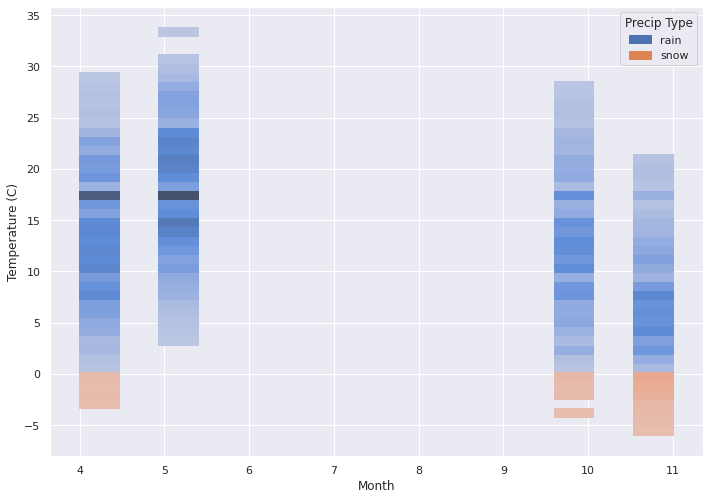

In [132]:
months = df_filter_pcloudy_missing['Month'].unique()
df_filter_not_missing = df_filter_pcloudy[df_filter_pcloudy['Missing'] == False]
df_filter_not_missing = df_filter_not_missing[df_filter_not_missing['Month'].isin(months)]
sns.histplot(x='Month', y='Temperature (C)', data=df_filter_not_missing, hue="Precip Type")

Broadly we can say if the temperature is < 0, "Precip Type" is "snow". Otherwise, it is "rain".

In [133]:
df['Precip Type'] = np.where((df['Precip Type'].isna()) & (df['Temperature (C)'] <= 0.0), 'snow', df['Precip Type'])
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
Date                          0
Time                          0
Month                         0
Year                          0
dtype: int64

In [134]:
df['Precip Type'] = np.where((df['Precip Type'].isna()) & (df['Temperature (C)'] > 0.0), 'rain', df['Precip Type'])
df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
Date                        0
Time                        0
Month                       0
Year                        0
dtype: int64

In [135]:
df['Precip Type'].value_counts()

rain    85741
snow    10712
Name: Precip Type, dtype: int64

In [136]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [137]:
df['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

In [138]:
df.drop(columns=['Loud Cover'], axis=1, inplace=True)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date,Time,Month,Year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006-03-31,22:00:00,3,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006-03-31,23:00:00,3,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006-04-01,00:00:00,4,2006
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006-04-01,01:00:00,4,2006
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006-04-01,02:00:00,4,2006


In [139]:
df.drop(columns=['Daily Summary'], axis=1, inplace=True)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Date,Time,Month,Year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006-03-31,22:00:00,3,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006-03-31,23:00:00,3,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006-04-01,00:00:00,4,2006
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006-04-01,01:00:00,4,2006
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006-04-01,02:00:00,4,2006


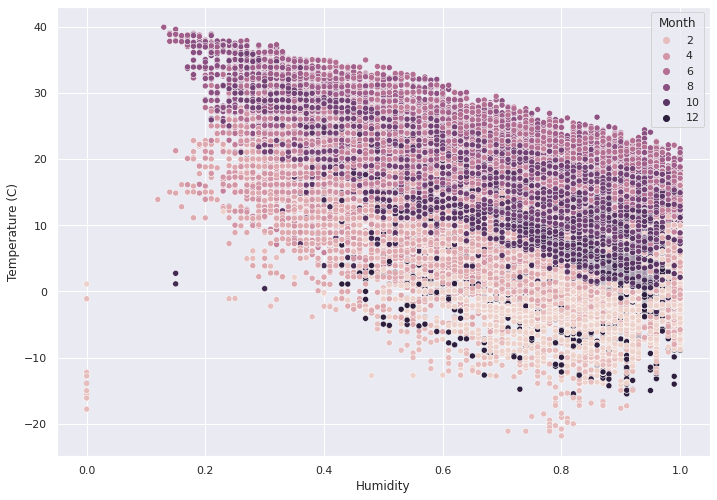

In [140]:
sns.scatterplot(x='Humidity', y='Temperature (C)', data=df, hue='Month')

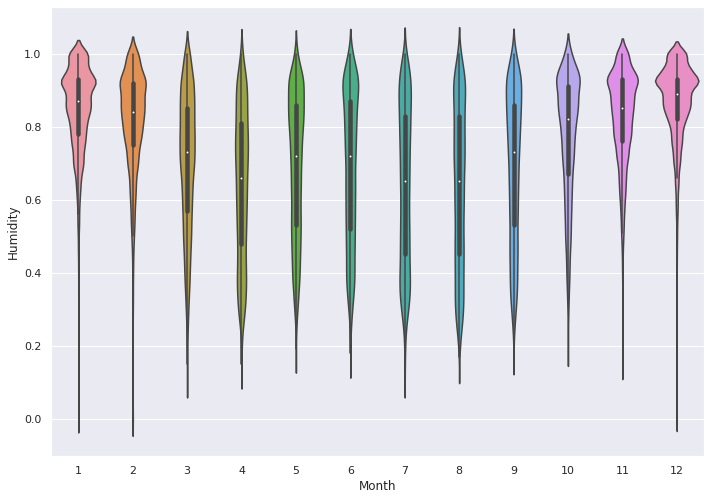

In [141]:
sns.violinplot(x='Month', y='Humidity', data=df)

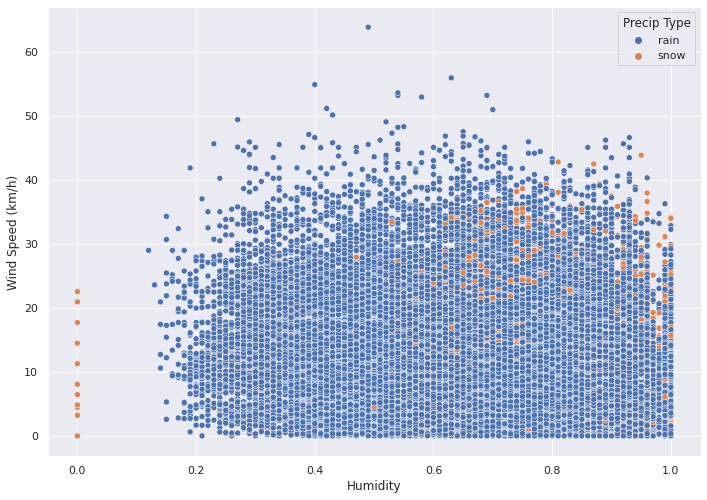

In [142]:
sns.scatterplot(x='Humidity', y='Wind Speed (km/h)', data=df, hue='Precip Type')

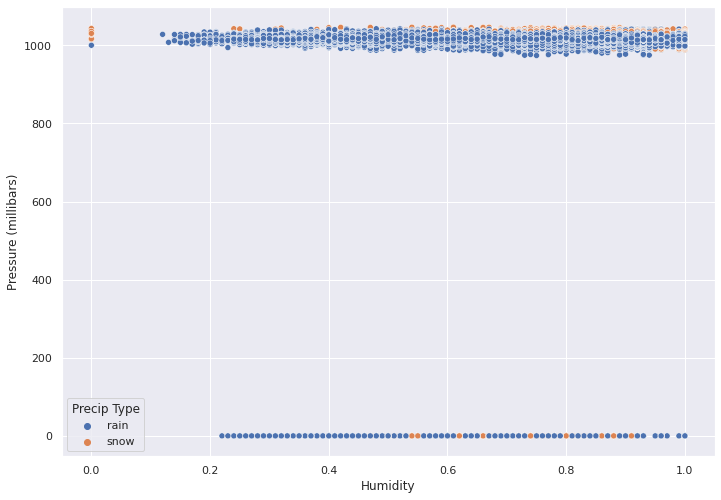

In [143]:
sns.scatterplot(x='Humidity', y='Pressure (millibars)', data=df, hue='Precip Type')

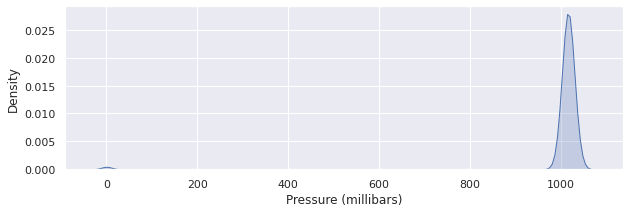

In [144]:
plt.figure(figsize=(10,3))
sns.kdeplot(df['Pressure (millibars)'], shade = True)

In [145]:
df['Pressure (millibars)'].value_counts()

0.00       1288
1017.70     123
1015.00     119
1018.00     118
1015.80     118
           ... 
991.31        1
989.50        1
1038.54       1
1040.10       1
1000.84       1
Name: Pressure (millibars), Length: 4979, dtype: int64

In [146]:
df = df[df['Pressure (millibars)'] > 0.0]
df['Pressure (millibars)'].describe()

count    95165.000000
mean      1016.814140
std          7.778356
min        973.780000
25%       1012.120000
50%       1016.550000
75%       1021.160000
max       1046.380000
Name: Pressure (millibars), dtype: float64

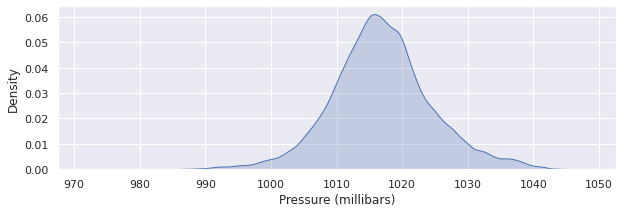

In [147]:
plt.figure(figsize=(10,3))
sns.kdeplot(df['Pressure (millibars)'], shade=True)

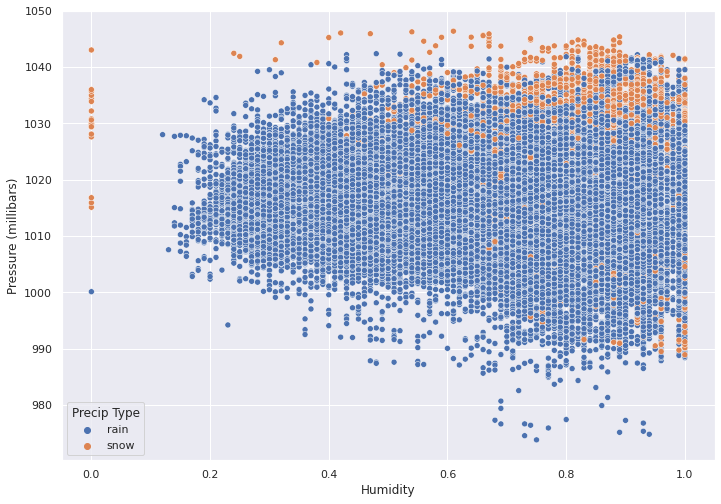

In [148]:
sns.scatterplot(x='Humidity', y='Pressure (millibars)', data=df, hue='Precip Type')

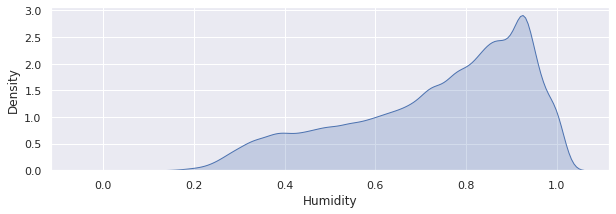

In [149]:
plt.figure(figsize=(10,3))
sns.kdeplot(df['Humidity'], shade=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


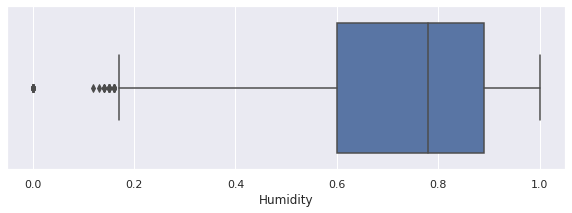

In [150]:
plt.figure(figsize=(10,3))
sns.boxplot(df['Humidity'])

In [151]:
day_group = df.groupby(['Date']).agg({'Temperature (C)': 'mean', 'Apparent Temperature (C)':'mean'})
day_group

,Temperature (C),Apparent Temperature (C)
Date,,
2005-12-31,0.577778,-4.050000
2006-01-01,4.075000,-0.174537
2006-01-02,5.263194,1.808796
2006-01-03,2.340509,0.445370
2006-01-04,2.251932,-0.644203
...,...,...
2016-12-27,0.278009,-3.160417
2016-12-28,0.222222,-3.225926
2016-12-29,0.167824,-3.265509


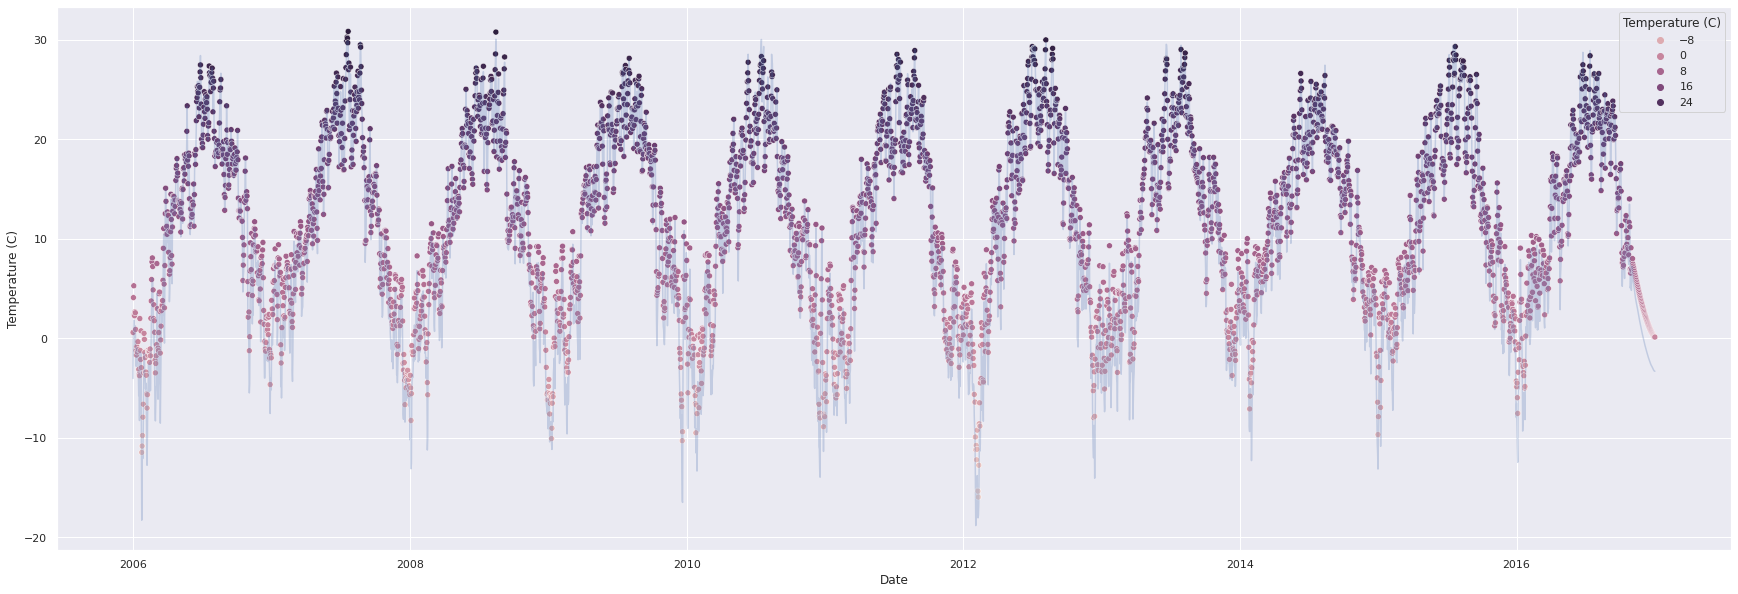

In [152]:
plt.figure(figsize=(30,10))
plt.plot(day_group.index, day_group['Apparent Temperature (C)'], alpha=0.25)
sns.scatterplot(x="Date", y='Temperature (C)', data=day_group, hue="Temperature (C)")

In [153]:
time_group = df.groupby(['Time', 'Month', 'Precip Type']).agg({'Temperature (C)': 'mean', 'Apparent Temperature (C)':'mean'})
time_group.reset_index(inplace=True)
time_group['Time'] = time_group['Time'].astype('string')
time_group

,Time,Month,Precip Type,Temperature (C),Apparent Temperature (C)
0,00:00:00,1,rain,3.179651,0.492825
1,00:00:00,1,snow,-3.950033,-6.607664
2,00:00:00,2,rain,3.777494,1.304956
3,00:00:00,2,snow,-3.808971,-6.785103
4,00:00:00,3,rain,5.465186,3.482103
...,...,...,...,...,...
424,23:00:00,10,snow,-1.274691,-1.822222
425,23:00:00,11,rain,5.732268,4.008828
426,23:00:00,11,snow,-2.026126,-3.813664
427,23:00:00,12,rain,3.619249,1.224925


<Figure size 1440x504 with 0 Axes>

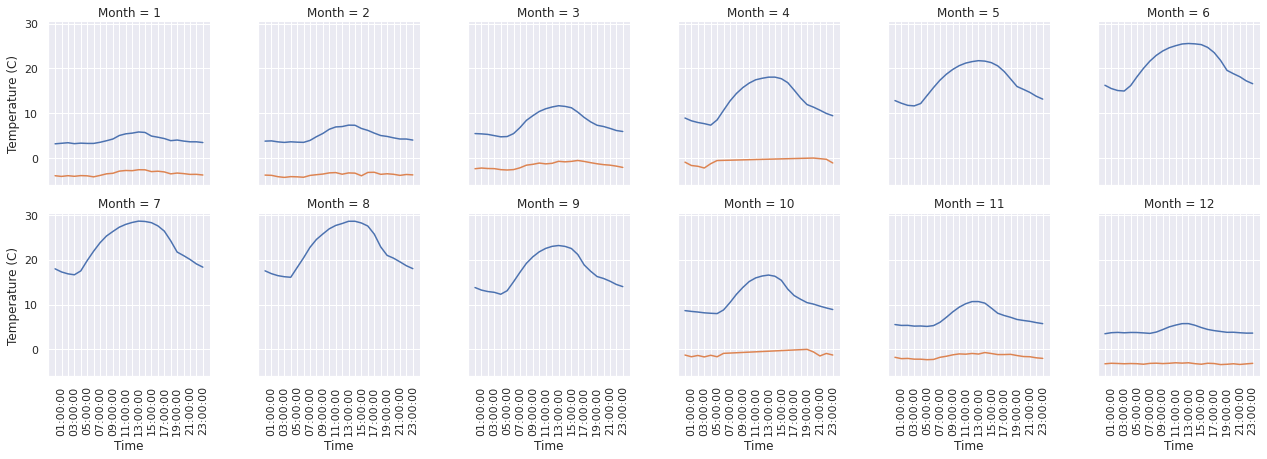

In [154]:
plt.figure(figsize=(20,7))
g = sns.FacetGrid(data=time_group, col='Month', hue='Precip Type', col_wrap=6)
g.map(sns.lineplot,'Time', 'Temperature (C)')
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%2 == 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=90) # set new labels
plt.show()

In [155]:
year_group = df.groupby(['Year', 'Month']).agg({'Temperature (C)': 'mean', 'Apparent Temperature (C)':'mean'})
year_group.reset_index(inplace=True)
year_group

,Year,Month,Temperature (C),Apparent Temperature (C)
0,2005,12,0.577778,-4.050000
1,2006,1,-1.709352,-4.208766
2,2006,2,-0.035284,-2.963154
3,2006,3,4.380223,1.756987
4,2006,4,12.635031,12.098827
...,...,...,...,...
128,2016,8,21.420296,21.383094
129,2016,9,18.467924,18.355833
130,2016,10,9.893242,8.923947
131,2016,11,5.282662,3.048627


<Figure size 1440x576 with 0 Axes>

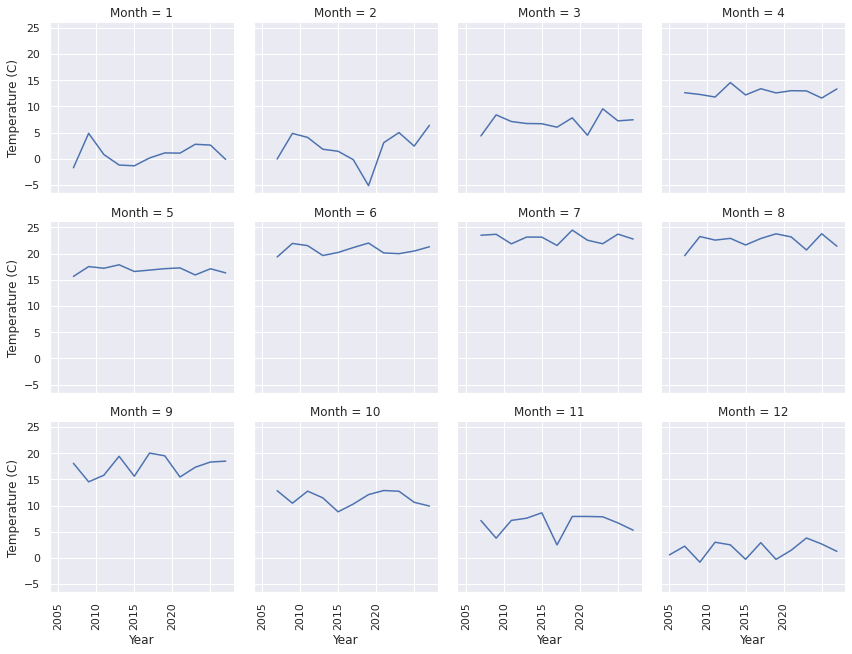

In [156]:
plt.figure(figsize=(20,8))
g = sns.FacetGrid(data=year_group, col='Month', col_wrap=4)
g.map(sns.lineplot,'Year', 'Temperature (C)')
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    # for i, l in enumerate(labels):
      # if(i%2 != 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=90) # set new labels
plt.show()

###EDA Ideas
- Create new categories for Summary & use that against other variables
- Add description for visualizations

###Modelling

In [157]:
df = df.drop(columns=['Year', 'Time', 'Date'])
print(df.columns)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Date', 'Time', 'Month'],
      dtype='object')


In [158]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

print(numeric_cols)
print()
print(categorical_cols)

['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

['Summary', 'Precip Type', 'Date', 'Time', 'Month']


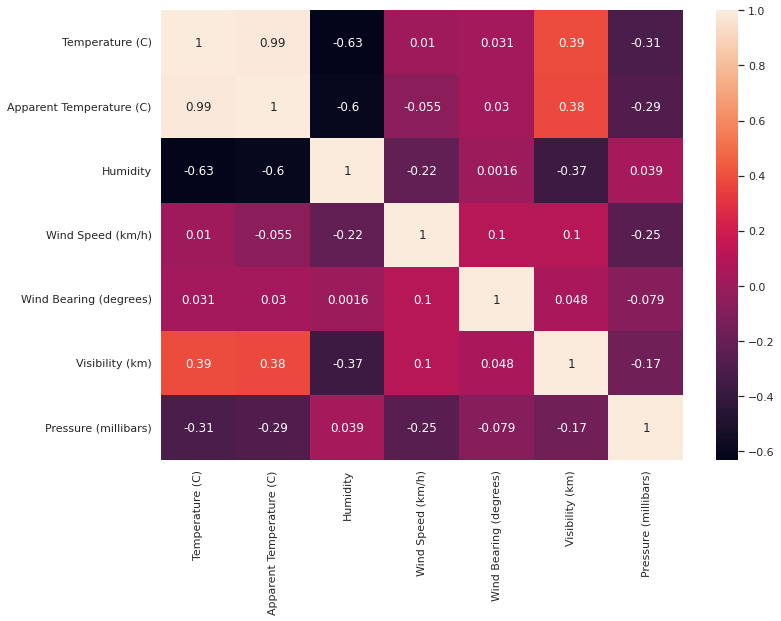

In [159]:
corr_df = df.corr()
sns.heatmap(corr_df, cbar='thermal', annot=True)

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorized_summary = vectorizer.fit_transform(df['Summary'].values)
vectorized_summary[0]

<1x15 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [161]:
vectorized_summary.shape

(95165, 15)

In [162]:
vectorized_summary[0].toarray()

array([[0.        , 0.        , 0.        , 0.57079669, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.82109143, 0.        , 0.        ]])

In [163]:
vectorized_summary = vectorized_summary.toarray()

In [164]:
for feat_index, feat_name in enumerate(vectorizer.get_feature_names()):
  df[feat_name] = vectorized_summary[:, feat_index]

In [165]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Date,Time,Month,and,breezy,clear,cloudy,dangerously,drizzle,dry,foggy,humid,light,mostly,overcast,partly,rain,windy
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006-03-31,22:00:00,3,0.0,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,0.0,0.0
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006-03-31,23:00:00,3,0.0,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,0.0,0.0
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006-04-01,00:00:00,4,0.0,0.0,0.0,0.549524,0.0,0.0,0.0,0.0,0.0,0.0,0.835478,0.0,0.000000,0.0,0.0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006-04-01,01:00:00,4,0.0,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,0.0,0.0
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006-04-01,02:00:00,4,0.0,0.0,0.0,0.549524,0.0,0.0,0.0,0.0,0.0,0.0,0.835478,0.0,0.000000,0.0,0.0


In [166]:
vectorizer_pt = TfidfVectorizer()
vectorized_precip = vectorizer_pt.fit_transform(df['Precip Type'].values)
vectorized_precip[0]

<1x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [167]:
vectorized_precip.shape

(95165, 2)

In [168]:
vectorized_precip[0].toarray()

array([[1., 0.]])

In [169]:
vectorizer_pt.get_feature_names()

['rain', 'snow']

In [170]:
vectorized_precip = vectorized_precip.toarray()

In [171]:
for feat_index, feat_name in enumerate(vectorizer_pt.get_feature_names()):
  df[feat_name] = vectorized_precip[:, feat_index]

In [172]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Date,Time,Month,and,breezy,clear,cloudy,dangerously,drizzle,dry,foggy,humid,light,mostly,overcast,partly,rain,windy,snow
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006-03-31,22:00:00,3,0.0,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006-03-31,23:00:00,3,0.0,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006-04-01,00:00:00,4,0.0,0.0,0.0,0.549524,0.0,0.0,0.0,0.0,0.0,0.0,0.835478,0.0,0.000000,1.0,0.0,0.0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006-04-01,01:00:00,4,0.0,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006-04-01,02:00:00,4,0.0,0.0,0.0,0.549524,0.0,0.0,0.0,0.0,0.0,0.0,0.835478,0.0,0.000000,1.0,0.0,0.0


In [173]:
print("Before:", df.columns)
df = df.drop(columns=['Formatted Date', 'Summary', 'Precip Type', 'and'])
print("After:", df.columns)

Before: Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Date', 'Time', 'Month', 'and', 'breezy', 'clear', 'cloudy',
       'dangerously', 'drizzle', 'dry', 'foggy', 'humid', 'light', 'mostly',
       'overcast', 'partly', 'rain', 'windy', 'snow'],
      dtype='object')
After: Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Month', 'breezy', 'clear', 'cloudy',
       'dangerously', 'drizzle', 'dry', 'foggy', 'humid', 'light', 'mostly',
       'overcast', 'partly', 'rain', 'windy', 'snow'],
      dtype='object')


In [174]:
df.head(10)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,breezy,clear,cloudy,dangerously,drizzle,dry,foggy,humid,light,mostly,overcast,partly,rain,windy,snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,3,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,3,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4,0.0,0.0,0.549524,0.0,0.0,0.0,0.0,0.0,0.0,0.835478,0.0,0.000000,1.0,0.0,0.0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,4,0.0,0.0,0.549524,0.0,0.0,0.0,0.0,0.0,0.0,0.835478,0.0,0.000000,1.0,0.0,0.0
5,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
6,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
7,8.772222,6.527778,0.89,14.1519,260.0,9.9820,1016.84,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
8,10.822222,10.822222,0.82,11.3183,259.0,9.9820,1017.37,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
9,13.772222,13.772222,0.72,12.5258,279.0,9.9820,1017.22,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0


In [175]:
from sklearn.preprocessing import StandardScaler

noncategoricaldata =  ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
standardization = StandardScaler()
standardization.fit(df[noncategoricaldata])
X_Scaled=standardization.transform(df[noncategoricaldata])
df[noncategoricaldata] = X_Scaled

In [176]:
df.head(10)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,breezy,clear,cloudy,dangerously,drizzle,dry,foggy,humid,light,mostly,overcast,partly,rain,windy,snow
0,-0.259481,-0.326538,0.792662,0.483947,0.591889,1.300518,-0.216517,3,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
1,-0.271702,-0.341614,0.639279,0.504971,0.666373,1.300518,-0.152236,3,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
2,-0.269374,-0.140420,0.792662,-0.994753,0.154294,1.092842,-0.112382,4,0.0,0.0,0.549524,0.0,0.0,0.0,0.0,0.0,0.0,0.835478,0.0,0.000000,1.0,0.0,0.0
3,-0.383439,-0.461707,0.485896,0.481611,0.759478,1.300518,-0.051957,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
4,-0.334554,-0.365009,0.485896,0.037767,0.666373,1.300518,-0.039101,4,0.0,0.0,0.549524,0.0,0.0,0.0,0.0,0.0,0.0,0.835478,0.0,0.000000,1.0,0.0,0.0
5,-0.285669,-0.352532,0.588151,0.460586,0.657062,1.092842,-0.019817,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
6,-0.441636,-0.501218,1.099429,0.229321,0.666373,-0.095522,-0.012103,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
7,-0.332808,-0.407119,0.792662,0.488619,0.675683,-0.095522,0.003325,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
8,-0.118064,-0.005251,0.434768,0.077479,0.666373,-0.095522,0.071463,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0
9,0.190959,0.270807,-0.076510,0.252681,0.852583,-0.095522,0.052178,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0


In [177]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Apparent Temperature (C)'])
y = df.loc[:, 'Apparent Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(71373, 22)
(23792, 22)
(71373,)
(23792,)


In [178]:
from sklearn.linear_model import LinearRegression

linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)
y_hat = linear_regr.predict(X_test)

In [179]:
y_hat.shape

(23792,)

In [180]:
from sklearn.metrics import mean_squared_error, r2_score

mse_linear_regr = mean_squared_error(y_test, y_hat)
print("MSE: ", mse_linear_regr)
r2_linear_regr = r2_score(y_test, y_hat)
print("R2 Score: ", r2_linear_regr)

MSE:  0.009957875060735302
R2 Score:  0.9901187268423104


In [181]:
X_temp = df.drop(columns=['Apparent Temperature (C)', 'Temperature (C)'])
y = df.loc[:, 'Apparent Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X_temp, y, shuffle=True, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(71373, 21)
(23792, 21)
(71373,)
(23792,)


In [182]:
from sklearn.linear_model import LinearRegression

linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)
y_hat = linear_regr.predict(X_test)

In [183]:
y_hat.shape

(23792,)

In [184]:
from sklearn.metrics import mean_squared_error, r2_score

mse_linear_regr = mean_squared_error(y_test, y_hat)
print("MSE: ", mse_linear_regr)
r2_linear_regr = r2_score(y_test, y_hat)
print("R2 Score: ", r2_linear_regr)

MSE:  0.3344723295709897
R2 Score:  0.6608673453851756


In [185]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=16, encode='ordinal', strategy='uniform') 
discretizer.fit(X_temp[['Wind Bearing (degrees)']])
X_temp['Wind Bearing (degrees)'] = discretizer.transform(X_temp[['Wind Bearing (degrees)']])

In [186]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
X_temp['Wind_Bearing_cat'] = label_enc.fit_transform(X_temp['Wind Bearing (degrees)'])

In [187]:
X_temp = X_temp.drop(columns=['Wind Bearing (degrees)'])
X_temp.head(10)

,Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Month,breezy,clear,cloudy,dangerously,drizzle,dry,foggy,humid,light,mostly,overcast,partly,rain,windy,snow,Wind_Bearing_cat
0,0.792662,0.483947,1.300518,-0.216517,3,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0,11
1,0.639279,0.504971,1.300518,-0.152236,3,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0,11
2,0.792662,-0.994753,1.092842,-0.112382,4,0.0,0.0,0.549524,0.0,0.0,0.0,0.0,0.0,0.0,0.835478,0.0,0.000000,1.0,0.0,0.0,9
3,0.485896,0.481611,1.300518,-0.051957,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0,11
4,0.485896,0.037767,1.300518,-0.039101,4,0.0,0.0,0.549524,0.0,0.0,0.0,0.0,0.0,0.0,0.835478,0.0,0.000000,1.0,0.0,0.0,11
5,0.588151,0.460586,1.092842,-0.019817,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0,11
6,1.099429,0.229321,-0.095522,-0.012103,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0,11
7,0.792662,0.488619,-0.095522,0.003325,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0,11
8,0.434768,0.077479,-0.095522,0.071463,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0,11
9,-0.076510,0.252681,-0.095522,0.052178,4,0.0,0.0,0.570797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.821091,1.0,0.0,0.0,12


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_temp, y, shuffle=True, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(71373, 21)
(23792, 21)
(71373,)
(23792,)


In [189]:
from sklearn.linear_model import LinearRegression

linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)
y_hat = linear_regr.predict(X_test)

In [190]:
y_hat.shape

(23792,)

In [191]:
from sklearn.metrics import mean_squared_error, r2_score

mse_linear_regr = mean_squared_error(y_test, y_hat)
print("MSE: ", mse_linear_regr)
r2_linear_regr = r2_score(y_test, y_hat)
print("R2 Score: ", r2_linear_regr)

MSE:  0.337856422258121
R2 Score:  0.6622196546638675


In [192]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
pca.fit(X_temp)
X_pca = pca.fit_transform(X_temp)

In [193]:
X_pca_df = pd.DataFrame(X_pca)
X_pca_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-3.262132,3.442813,0.423095,0.003031,-0.646298,-1.212367,-0.156206,-0.790343,-0.114277,0.096559,-0.080605,-0.037563
1,-3.261445,3.444081,0.496383,-0.089192,-0.547964,-1.152394,-0.161978,-0.761970,-0.114480,0.087366,-0.086310,-0.037890
2,-1.198942,2.450230,-0.286412,-0.564320,-1.461105,-0.684839,0.676000,0.135517,-0.074978,-0.118353,-0.115192,0.032075
3,-3.230787,2.444878,0.585605,-0.201478,-0.458625,-1.090954,-0.174723,-0.723742,-0.093521,0.068788,-0.093064,-0.036793
4,-3.221222,2.431035,0.362719,-0.321791,-0.742636,-1.025001,0.653936,0.118571,-0.065662,-0.069609,-0.153123,-0.011330
5,-3.227452,2.436544,0.389220,-0.120802,-0.401686,-1.036134,-0.157380,-0.750588,-0.127238,0.072093,-0.054532,-0.035199
6,-3.209073,2.393122,-0.675709,0.371549,-0.215324,-0.570845,-0.068520,-0.878868,-0.285869,0.089267,0.162777,-0.021455
7,-3.214612,2.406628,-0.399247,0.370938,0.061716,-0.491487,-0.082082,-0.841709,-0.274132,0.091529,0.153988,-0.031298
8,-3.204192,2.397976,-0.389232,-0.022392,-0.048055,-0.146472,-0.101658,-0.733110,-0.251338,0.043234,0.136353,-0.013001
9,-4.207588,2.384154,-0.040665,-0.141607,0.225111,0.107769,-0.130182,-0.643237,-0.217921,0.031369,0.118473,-0.018986


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, shuffle=True, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(71373, 12)
(23792, 12)
(71373,)
(23792,)


In [195]:
from sklearn.linear_model import LinearRegression

linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)
y_hat = linear_regr.predict(X_test)

In [196]:
y_hat.shape

(23792,)

In [197]:
from sklearn.metrics import mean_squared_error, r2_score

mse_linear_regr = mean_squared_error(y_test, y_hat)
print("MSE: ", mse_linear_regr)
r2_linear_regr = r2_score(y_test, y_hat)
print("R2 Score: ", r2_linear_regr)

MSE:  0.3360425439209515
R2 Score:  0.6649281661518136


In [198]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_hat = rf_reg.predict(X_test)

In [199]:
y_hat.shape

(23792,)

In [200]:
mse_linear_regr = mean_squared_error(y_test, y_hat)
print("MSE: ", mse_linear_regr)
r2_linear_regr = r2_score(y_test, y_hat)
print("R2 Score: ", r2_linear_regr)

MSE:  0.08965679823714891
R2 Score:  0.9106021890807222


In [201]:
!pip install lightgbm

In [202]:
!pip install wandb

In [203]:
# !wandb login

In [204]:
import lightgbm as lgb

In [205]:
import wandb
from wandb.lightgbm import wandb_callback

wandb.init(project="211107_lgb_model_1", entity="nandini1999")

validation_l1,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation_l2,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation_rmse,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation_l1,0.24301
validation_l2,0.09832
validation_rmse,0.31357


In [206]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [207]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'l1', 'rmse'],
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'is_unbalance':True
}

In [208]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                valid_names=('validation'),
                early_stopping_rounds=5,
                callbacks=[wandb_callback()])

print('Saving model...')
# save model to file
gbm.save_model('model_lightgbm.pkl')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
mse_test = mean_squared_error(y_test, y_pred)
print(f'The RMSE of prediction is: {mse_test}')

[1]	validation's rmse: 0.967398	validation's l1: 0.816562	validation's l2: 0.935859
Training until validation scores don't improve for 5 rounds.
[2]	validation's rmse: 0.928558	validation's l1: 0.783427	validation's l2: 0.862221
[3]	validation's rmse: 0.892879	validation's l1: 0.752072	validation's l2: 0.797234
[4]	validation's rmse: 0.858071	validation's l1: 0.722474	validation's l2: 0.736286
[5]	validation's rmse: 0.830894	validation's l1: 0.700883	validation's l2: 0.690385
[6]	validation's rmse: 0.799011	validation's l1: 0.673729	validation's l2: 0.638418
[7]	validation's rmse: 0.774954	validation's l1: 0.654352	validation's l2: 0.600553
[8]	validation's rmse: 0.746364	validation's l1: 0.629735	validation's l2: 0.557059
[9]	validation's rmse: 0.725096	validation's l1: 0.612251	validation's l2: 0.525764
[10]	validation's rmse: 0.70028	validation's l1: 0.590077	validation's l2: 0.490393
[11]	validation's rmse: 0.676167	validation's l1: 0.568986	validation's l2: 0.457202
[12]	validatio

In [209]:
r2_linear_regr = r2_score(y_test, y_pred)
print("R2 Score: ", r2_linear_regr)

R2 Score:  0.9025050773510406


In [210]:
print(f'Feature importances: {list(gbm.feature_importance())}')

Feature importances: [2727, 4250, 2241, 2483, 2387, 2696, 1645, 1839, 2640, 1687, 1867, 1888]


In [211]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_scaling = Pipeline(steps=[
    ('scaler', StandardScaler())
])

numerical_discretizer = Pipeline(steps=[
    ('discretizer', KBinsDiscretizer(n_bins=16, encode='ordinal', strategy='uniform')),
    ('encoder', LabelEncoder())
])

categorical_transformer = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_scaling, numeric_cols),
        ('discretizer', numerical_discretizer, ['Wind Bearing (degrees)']),
        ('cat', categorical_transformer, categorical_cols)
    ])